In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ROOT
import ctypes
import glob
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np

from main.data_tools.extract_Nevents import get_Nevents

Welcome to JupyROOT 6.26/04


In [2]:
ROOT.gROOT.LoadMacro('/home/jykim/workspace/DRAW_and_FITTING/main/Belle2Style.C')
ROOT.SetBelle2Style()


Applying BELLE2 style settings...


In [120]:
file1_name="test2_x_D0.png"
file2_name="test2_y_D0.png"
# file1_name="test2_x_D0bar.png"
# file2_name="test2_y_D0bar.png"
file1_name="/media/jykim/T7/saved_plots/fitting/results/antiKstargamma/2d_fit/mc15rd_4S_D0M.png"
file2_name="/media/jykim/T7/saved_plots/fitting/results/antiKstargamma/2d_fit/mc15rd_4S_cosHel.png"


# Extract 2D data(ROOT)

In [4]:
base_file_loc =  '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_preext_maxFBDT_2ndFBDT/'
# base_file_loc =  '/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/'

loc_ccbar = base_file_loc + 'ccbar/*.root'
# loc_ccbar = base_file_loc + 'topo/resultfile/result_antiKstar/standard.root'
loc_uubar = base_file_loc + 'uubar/*.root'
loc_ddbar = base_file_loc + 'ddbar/*.root'
loc_ssbar = base_file_loc + 'ssbar/*.root'
loc_charged = base_file_loc + 'charged/*.root'
loc_mixed = base_file_loc + 'mixed/*.root'
loc_taupair = base_file_loc + 'taupair/*.root'

file_list = [loc_ccbar,loc_uubar,loc_uubar,loc_ssbar,loc_charged,loc_mixed,loc_taupair]


loc_ccbar_CC = base_file_loc + 'ccbar/*.root/antiKstar_cc'
# loc_ccbar = base_file_loc + 'topo/resultfile/result_antiKstar/standard.root'
loc_uubar_CC = base_file_loc + 'uubar/*.root/antiKstar_cc'
loc_ddbar_CC = base_file_loc + 'ddbar/*.root/antiKstar_cc'
loc_ssbar_CC = base_file_loc + 'ssbar/*.root/antiKstar_cc'
loc_charged_CC = base_file_loc + 'charged/*.root/antiKstar_cc'
loc_mixed_CC = base_file_loc + 'mixed/*.root/antiKstar_cc'
loc_taupair_CC = base_file_loc + 'taupair/*.root/antiKstar_cc'


file_list += [loc_ccbar_CC,loc_uubar_CC,loc_uubar_CC,loc_ssbar_CC,loc_charged_CC,loc_mixed_CC,loc_taupair_CC]


In [5]:
mychain = ROOT.TChain("antiKstar")
# mychain = ROOT.TChain("phi_cc")

for i in file_list:
    mychain.Add(i)

In [6]:
print(file_list)

['/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_preext_maxFBDT_2ndFBDT/ccbar/*.root', '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_preext_maxFBDT_2ndFBDT/uubar/*.root', '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_preext_maxFBDT_2ndFBDT/uubar/*.root', '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_preext_maxFBDT_2ndFBDT/ssbar/*.root', '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_preext_maxFBDT_2ndFBDT/charged/*.root', '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_preext_maxFBDT_2ndFBDT/mixed/*.root', '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_preext_maxFBDT_2ndFBDT/taupair/*.root', '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_preext_maxFBDT_2ndFBDT/ccbar/*.root/antiKstar_cc', '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_preext_maxFBDT_2ndFBDT/uubar/*.root/antiKstar_cc', '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_preext_maxFBDT_2ndFBDT/uubar/*.root/antiKstar_c

In [7]:
yrange = (-1, 1)
x = ROOT.RooRealVar("D0_M", "M(D^{0}) [GeV/c^{2}]", 1.68, 2.05, "")
y = ROOT.RooRealVar("D0_cosHel_0", "cos#theta_{H}", yrange[0], yrange[1], "")
a = ROOT.RooRealVar("antiKstar_M", "",0,10, "")
b = ROOT.RooRealVar("Dstarp_CMS_p", "",0,10, "")
c = ROOT.RooRealVar("Dstarp_isSignal", "",-10,10, "")
d = ROOT.RooRealVar("gamma_E", "",0,10, "")
e = ROOT.RooRealVar("Pi0_Prob2", "",0,10, "")
f = ROOT.RooRealVar("Dstarp_delM", "",0,10, "")
# g = ROOT.RooRealVar("iCascDcyBrP_Dst_0", "",-200,200, "")

# h = ROOT.RooRealVar("iCascDcyBrP_Dstm_0", "",-200,200, "")

In [8]:
Cut="D0_M>1.68 & D0_M<2.05 & abs(antiKstar_M - 0.89555) < 0.06 &  Dstarp_CMS_p>2.5  "
Cut+="& gamma_E>0.45 & Pi0_Prob2>0.58 & abs(Dstarp_delM-0.1455)<0.00077 "

# 
# Cut=" iCascDcyBrP_Dst_0>0 && iCascDcyBrP_Dst_0<2 "

# data = ROOT.RooDataSet("data","", ROOT.RooArgSet(x,y,z), ROOT.RooFit.Import(mychain), Cut=" D0_M>1.68 & D0_M<2.05 & Belle2Pi0Veto_75MeV > 0.022 ")
before_data = ROOT.RooDataSet("data","", ROOT.RooArgSet(x,y,a,b,c,d,e,f), ROOT.RooFit.Import(mychain), Cut=Cut)


w_1 = ROOT.RooRealVar('w_1', 'w', 0,1)

w_1.setVal(1/4)
# w_1.setVal(1)
before_data.addColumn(w_1)
data = ROOT.RooDataSet(before_data.GetName(), before_data.GetTitle(),before_data, before_data.get(), '' ,  'w_1')
N_total = data.sumEntries()
print(N_total)

45161.5
[#1] INFO:InputArguments -- The formula D0_M>1.68 & D0_M<2.05 & abs(antiKstar_M - 0.89555) < 0.06 &  Dstarp_CMS_p>2.5  & gamma_E>0.45 & Pi0_Prob2>0.58 & abs(Dstarp_delM-0.1455)<0.00077  claims to use the variables (D0_M,D0_cosHel_0,antiKstar_M,Dstarp_CMS_p,Dstarp_isSignal,gamma_E,Pi0_Prob2,Dstarp_delM) but only (D0_M,antiKstar_M,Dstarp_CMS_p,gamma_E,Pi0_Prob2,Dstarp_delM) seem to be in use.
  inputs:         D0_M>1.68 & D0_M<2.05 & abs(antiKstar_M - 0.89555) < 0.06 &  Dstarp_CMS_p>2.5  & gamma_E>0.45 & Pi0_Prob2>0.58 & abs(Dstarp_delM-0.1455)<0.00077 
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #11 because D0_M cannot accommodate the value 1.66548
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #21 because D0_M cannot accommodate the value 2.08601
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #22 because D0_M cannot accommodate the value 2.07932
[#1] INFO:DataHandling -- RooTreeDataStore::

In [9]:
data.Print()

RooDataSet::data[D0_M,D0_cosHel_0,antiKstar_M,Dstarp_CMS_p,Dstarp_isSignal,gamma_E,Pi0_Prob2,Dstarp_delM,weight:w_1] = 180646 entries (45161.5 weighted)


In [10]:
# ROOT.RooClassFactory.makePdf("MyPdf_xsquared_nopara", "x", "", "x*x")
ROOT.gROOT.ProcessLineSync(".x MyPdf_xsquared_nopara.cxx+")

94185332207056

(MyPdf_xsquared_nopara) An instance of MyPdf_xsquared_nopara.


In [11]:
# ROOT.RooClassFactory.makePdf("MyPdf_one_minus_squared", "y", "", "1-y*y")
ROOT.gROOT.ProcessLineSync(".x MyPdf_one_minus_squared.cxx+")

94184927976640

(MyPdf_one_minus_squared) An instance of MyPdf_one_minus_squared.


## Vg

### D0M

In [101]:
f = ROOT.TFile.Open("/home/jykim/workspace/DRAW_and_FITTING/main/FITTING/antiKstargamma/MC15rd/antiKstarg_MC15rd_Vg_fitresult_D0M.root")
result_object = ROOT.gDirectory.Get("antiKstarg")
f.Close()

fit_args = result_object.floatParsFinal()

x_sig_alpha= ROOT.RooRealVar("x_sig_alpha", "",  fit_args.at(0).getVal()) 
x_sig_mean = ROOT.RooRealVar("x_sig_mean", "",  fit_args.at(1).getVal()) 
# x_sig_mean = ROOT.RooRealVar("x_sig_mean", "mean of gaussians", 1.863,1.86, 1.88)

x_sig_n_CB = ROOT.RooRealVar("x_sig_n_CB", "",  fit_args.at(2).getVal()) 
x_sig_sig1frac = ROOT.RooRealVar("x_sig_sig1frac", "",  fit_args.at(3).getVal()) 
x_sig_sigma1 = ROOT.RooRealVar("x_sig_sigma1", "",  fit_args.at(4).getVal()) 
x_sig_sigma2 = ROOT.RooRealVar("x_sig_sigma2", "",  fit_args.at(5).getVal()) 

### cosHel 

In [61]:
y_sig_model = ROOT.MyPdf_one_minus_squared("y_sig_model", "y_sig", y)

## Vpi0

### D0M

In [62]:
f = ROOT.TFile.Open("antiKstarg_MC15rd_Vpi0_fitresult.root")
result_object2 = ROOT.gDirectory.Get("antiKstarg")
f.Close()

result_object2.Print()

fit_args2 = result_object2.floatParsFinal()

#V pi0
x_bkg1_alphaL = ROOT.RooRealVar("x_bkg1_alphaL", "",  fit_args2.at(0).getVal()) 
x_bkg1_alphaR = ROOT.RooRealVar("x_bkg1_alphaR", "",  fit_args2.at(1).getVal()) 

x_bkg1_mean = ROOT.RooRealVar("x_bkg1_mean", "",  fit_args2.at(2).getVal()) 
x_bkg1_nL = ROOT.RooRealVar("x_bkg1_nL", "",  fit_args2.at(3).getVal()) 
x_bkg1_nR = ROOT.RooRealVar("x_bkg1_nR", "",  fit_args2.at(4).getVal()) 

x_bkg1_sigmaL = ROOT.RooRealVar("x_bkg1_sigmaL", "",  fit_args2.at(5).getVal()) 
x_bkg1_sigmaR = ROOT.RooRealVar("x_bkg1_sigmaR", "",  fit_args2.at(6).getVal()) 





  RooFitResult: minimized FCN value: -62468, estimated distance to minimum: 3.85671e-05
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
                alphaL    1.0464e+00 +/-  4.64e-02
                alphaR    2.3110e+00 +/-  5.45e-02
                  mean    1.8447e+00 +/-  5.49e-04
                    nL    2.0139e+00 +/-  1.78e-01
                    nR    8.3303e-01 +/-  7.74e-02
                sigmaL    3.0855e-02 +/-  9.99e-04
                sigmaR    1.5931e-02 +/-  3.52e-04



### cosHel 

In [63]:
# ROOT.RooClassFactory.makePdf("MyPdf_xsquared_nopara", "x", "", "x*x")
# ROOT.gROOT.ProcessLineSync(".x MyPdf_xsquared_nopara.cxx+")



In [64]:
# y_bkg1_model = ROOT.MyPdf_xsquared_nopara("y_bkg1_model", "y_bkg1", y)

In [65]:
f = ROOT.TFile.Open("antiKstarg_Vpi0_fitresult_cosHel.root")
result_object2_y = ROOT.gDirectory.Get("antiKstarg")
f.Close()

result_object2_y.Print()

fit_args2_y = result_object2_y.floatParsFinal()


  RooFitResult: minimized FCN value: 13403.4, estimated distance to minimum: 0.00241973
                covariance matrix quality: Full matrix, but forced positive-definite
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
              Cheby_c0    5.2123e-01 +/-  2.28e-02
              Cheby_c1    8.9620e-01 +/-  4.83e-02
              Cheby_c2    9.4584e-02 +/-  2.91e-02
                 frac2    5.1431e-01 +/-  6.76e-02
              sig2frac    7.5590e-01 +/-  4.75e-02
                y_mean    4.8463e-01 +/-  3.11e-03
              y_sigma1    3.0000e-01 +/-  2.27e-01
              y_sigma2    9.4285e-02 +/-  5.02e-03



In [66]:
y_bkg1_Cheby_c0 = ROOT.RooRealVar("y_bkg1_Cheby_c0", "c0",fit_args2_y.at(0).getVal())
y_bkg1_Cheby_c1 = ROOT.RooRealVar("y_bkg1_Cheby_c1", "c0",fit_args2_y.at(1).getVal())
y_bkg1_Cheby_c2 = ROOT.RooRealVar("y_bkg1_Cheby_c2", "c0",fit_args2_y.at(2).getVal())

y_bkg1_double_gauss_frac  = ROOT.RooRealVar("y_bkg1_double_gauss_frac", "c0",fit_args2_y.at(3).getVal())
y_bkg1_pdf_frac  = ROOT.RooRealVar("y_bkg1_pdf_frac", "c0",fit_args2_y.at(4).getVal())


y_bkg1_mean = ROOT.RooRealVar("y_bkg1_mean", "mean of gaussians",fit_args2_y.at(5).getVal())
y_bkg1_sigma1 = ROOT.RooRealVar("y_bkg1_sigma1", "width of gaussians", fit_args2_y.at(6).getVal())
y_bkg1_sigma2 = ROOT.RooRealVar("y_bkg1_sigma2", "width of gaussians", fit_args2_y.at(7).getVal())



## others

### D0M

In [81]:
f = ROOT.TFile.Open("antiKstarg_MC15rd_except_Vpi0_Vg_fitresult_D0M_generic.root")
result_object4 = ROOT.gDirectory.Get("antiKstarg")
f.Close()

fit_args4 = result_object4.floatParsFinal()

x_bkg2_mean = ROOT.RooRealVar("x_bkg2_mean", "mean of gaussians",fit_args4.at(0).getVal())
x_bkg2_frac = ROOT.RooRealVar("x_bkg2_frac", "",fit_args4.at(1).getVal())
# x_bkg2_frac = ROOT.RooRealVar("x_bkg2_frac", "",0.5, 0.0, 1.0)

x_bkg2_sigma = ROOT.RooRealVar("x_bkg2_sigma", "",fit_args4.at(2).getVal())
x_bkg2_c0 = ROOT.RooRealVar("x_bkg2_c0", "",fit_args4.at(3).getVal())
x_bkg2_c1 = ROOT.RooRealVar("x_bkg2_c1", "",fit_args4.at(4).getVal())


### cosHel 

In [82]:
f = ROOT.TFile.Open("antiKstarg_MC15rd_except_Vpi0_Vg_fitresult_cosHel_generic.root")
result_object4_y = ROOT.gDirectory.Get("antiKstarg")
f.Close()

fit_args4_y = result_object4_y.floatParsFinal()


y_bkg2_c0 = ROOT.RooRealVar("y_bkg2_c0", "",  fit_args4_y.at(0).getVal()) 
y_bkg2_c1 = ROOT.RooRealVar("y_bkg2_c1", "",  fit_args4_y.at(1).getVal()) 
y_bkg2_c2 = ROOT.RooRealVar("y_bkg2_c2", "",  fit_args4_y.at(2).getVal()) 

## Fitting

In [102]:
#D0_M
x_sig_sig1 = ROOT.RooGaussian("x_sig_sig1", "Signal component 1", x, x_sig_mean, x_sig_sigma1)
x_sig_sig2 =  ROOT.RooCBShape("x_sig_sig2", "Signal component 2", x, x_sig_mean, x_sig_sigma2, x_sig_alpha, x_sig_n_CB)
x_sig_model = ROOT.RooAddPdf("x_sig_model", "model", [x_sig_sig1, x_sig_sig2], x_sig_sig1frac)

x_bkg1_model = ROOT.RooCrystalBall("x_bkg1_model", "Signal component 2", x, x_bkg1_mean, x_bkg1_sigmaL, x_bkg1_sigmaR, x_bkg1_alphaL, x_bkg1_nL, x_bkg1_alphaR, x_bkg1_nR)

x_bkg2_1 = ROOT.RooGaussian("x_bkg2_1", "Signal component 1", x, x_bkg2_mean, x_bkg2_sigma)
x_bkg2_2 = ROOT.RooPolynomial("x_bkg2_2", "Signal component 1", x, ROOT.RooArgList(x_bkg2_c0, x_bkg2_c1))
x_bkg2_model = ROOT.RooAddPdf("x_bkg2_model", "model", [x_bkg2_1, x_bkg2_2], x_bkg2_frac)



[#0] WARNING:InputArguments -- The parameter 'x_sig_sigma1' with range [-1e+30, 1e+30] of the RooGaussian 'x_sig_sig1' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'x_bkg1_sigmaL' with range [-1e+30, 1e+30] of the RooCrystalBall 'x_bkg1_model' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'x_bkg1_sigmaR' with range [-1e+30, 1e+30] of the RooCrystalBall 'x_bkg1_model' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'x_bkg1_alphaL' with range [-1e+30, 1e+30] of the RooCrystalBall 'x_bkg1_model' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'x_bkg1_alphaR' with range [-1e+30, 1e+30] of the RooCrystalBall 'x_bkg1_model' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'x_bkg1_nL' with rang

In [103]:
#cosHel
y_sig_model = ROOT.MyPdf_one_minus_squared("y_sig_model", "y_sig", y)

y_bkg1_1 = ROOT.RooGaussian("sig2_1", "Signal component 1", y, y_bkg1_mean,y_bkg1_sigma1)
y_bkg1_2 = ROOT.RooGaussian("sig2_2", "Signal component 1", y, y_bkg1_mean,y_bkg1_sigma2)
y_bkg1_12_combined = ROOT.RooAddPdf("y_bkg1_12_combined", "model", [y_bkg1_1, y_bkg1_2], y_bkg1_double_gauss_frac)
y_bkg1_3 = ROOT.RooChebychev("y_bkg1_3", "Signal component 1", y, ROOT.RooArgList(y_bkg1_Cheby_c0, y_bkg1_Cheby_c1, y_bkg1_Cheby_c2))
y_bkg1_model = ROOT.RooAddPdf("y_bkg1_model", "model", [y_bkg1_3, y_bkg1_12_combined], y_bkg1_pdf_frac)

y_bkg2_model= ROOT.RooChebychev("y_bkg2_model", "Signal component 1", y, ROOT.RooArgList(y_bkg2_c0, y_bkg2_c1, y_bkg2_c2))

[#0] WARNING:InputArguments -- The parameter 'y_bkg1_sigma1' with range [-1e+30, 1e+30] of the RooGaussian 'sig2_1' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'y_bkg1_sigma2' with range [-1e+30, 1e+30] of the RooGaussian 'sig2_2' exceeds the safe range of (0, inf). Advise to limit its range.


In [104]:
sig_model = ROOT.RooProdPdf("sig_model","sig_xy_model",ROOT.RooArgSet(x_sig_model, y_sig_model))

bkg1_xy_model = ROOT.RooProdPdf("bkg1_xy_model","bkg1_xy_model",ROOT.RooArgSet(x_bkg1_model,y_bkg1_model))
bkg2_xy_model = ROOT.RooProdPdf("bkg2_xy_model","bkg2_xy_model",ROOT.RooArgSet(x_bkg2_model,y_bkg2_model))
# bkg3_xy_model = ROOT.RooProdPdf("bkg3_xy_model","bkg3_xy_model",ROOT.RooArgSet(x_bkg3_model,y_bkg3_model))



In [105]:
nsig = ROOT.RooRealVar("nsig","# signal events",N_total*0.01,0,N_total*0.5)
nbkg1 = ROOT.RooRealVar("nbkg1","# bkg events",N_total*0.8,0, N_total)
nbkg2 = ROOT.RooRealVar("nbkg2","# bkg events",N_total*0.1,0, N_total)
# nbkg3 = ROOT.RooRealVar("nbkg3","# bkg events",N_total*0.1,0, N_total*0.5)

extended_model = ROOT.RooAddPdf("extended_model", "x_model", ROOT.RooArgSet(sig_model,bkg1_xy_model,bkg2_xy_model), ROOT.RooArgSet(nsig, nbkg1, nbkg2))


[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:NumericIntegration -- RooRealIntegral::init(y_sig_model_Int[D0_cosHel_0]) using numeric integrator RooIntegrator1D to calculate Int(D0_cosHel_0)
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 12 remote server process.
[#1] INFO:NumericIntegration -- RooRealIntegral::init(y_sig_model_Int[D0_cosHel_0]) using numeric integrator RooIntegrator1D to calculate Int(D0_cosHel_0)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(y_sig_model_Int[D0_cosHel_0]) using numeric integrator RooIntegrator1D to calculate Int(D0_cosHel_0)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(y_sig_model_Int[D0_cosHel_0]) using numeric integrator RooIntegrator1D to calculate Int(D0_cosHel_0)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(y_sig_model_Int[D0_cosHel_0]) using numeric integrator RooIntegrator1D to calculate Int(D0_cosHel_0)
[#1] INFO:NumericIntegration -- RooRealIntegra

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file /media/jykim/T7/saved_plots/fitting/results/antiKstargamma/2d_fit/mc15rd_4S_D0M.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file /media/jykim/T7/saved_plots/fitting/results/antiKstargamma/2d_fit/mc15rd_4S_cosHel.png has been created


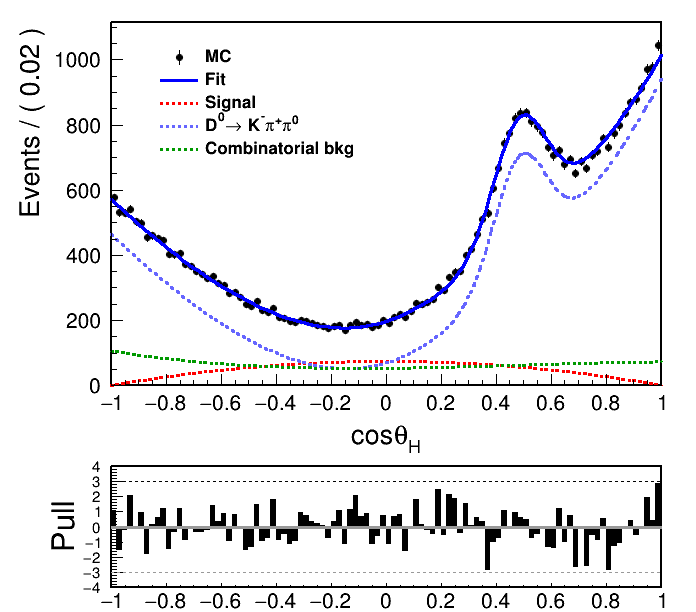

In [121]:
canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

    # r = sig.fitTo(data,NumCPU=12, Range=(1.84,1.89))
# r = sig_xy_model.fitTo(data,NumCPU=12, Range=(1.70,1.98))
# r = extended_model.fitTo(data,NumCPU=12, Extended=ROOT.kTRUE)
r = extended_model.fitTo(data,NumCPU=12, Extended=ROOT.kTRUE,PrintLevel=-1, Save=1,SumW2Error=True)

r.Print()
canv.cd(1) 
#     frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

data.plotOn(frame,Name = "data1", XErrorSize=0)

# sig_xy_model.plotOn(frame,Components=mass_sig, ProjWData=data, Name="fitting")
extended_model.plotOn(frame, Name="fitx_sig", Components=x_sig_model, LineStyle=ROOT.kDashed, LineColor='r')
# extended_model.plotOn(frame, Name="fitx_bkg", Components=ROOT.RooArgSet(x_bkg1_model,x_bkg2_model), LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+2)
extended_model.plotOn(frame, Name="fitx_bkg1", Components=x_bkg1_model, LineStyle=ROOT.kDashed, LineColor=593)
extended_model.plotOn(frame, Name="fitx_bkg2", Components=x_bkg2_model, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+2)
# extended_model.plotOn(frame, Name="fitx_bkg3", Components=x_bkg3_model, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+10)



# extended_model.plotOn(frame, Name="fitx1", Components=x_bkg2_model, LineStyle=ROOT.kDashed, LineColor=593)

# extended_model.plotOn(frame, Name="fitx2", Components=x_sig_3, LineStyle=ROOT.kDashed, LineColor='r')
#sig_xy_model.plotOn(frame, Name="fitx3", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

extended_model.plotOn(frame,Name="fitting")
frame.Draw("PE")

    # sig.paramOn(frame)
frame.GetXaxis().CenterTitle(True)

    

leg1 = ROOT.TLegend(0.62, 0.65, 0.92, 0.9)
# leg1.SetFillColor(ROOT.kWhite)
leg1.SetFillColor(0)

    # leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "Fit", "l")
leg1.AddEntry("fitx_sig", "Signal", "l")
leg1.AddEntry("fitx_bkg1", "D^{0}#rightarrow K^{-}#pi^{+}#pi^{0}", "l")
leg1.AddEntry("fitx_bkg2", "Combinatorial bkg", "l")
# leg1.AddEntry("fitx_bkg3", "bkg3", "l")

# leg1.SetTextSize(0.05)
# leg1.SetTextAlign(13)

leg1.SetBorderSize(0)
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
    # pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
    # pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.22)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.15)
pullplot.GetYaxis().SetLabelSize(0.105)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(1.68)
xmax1 = ctypes.c_double(2.05)
    # xmin1 = 0.1
    # xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kGray+1)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kBlack)
line2.SetLineColor(ROOT.kGray+1)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs(file1_name)

#######################################
canv2 = ROOT.TCanvas("Canvas", "Canvas", 700, 640)
# canv2.cd()
y_xlow = ctypes.c_double()
y_ylow = ctypes.c_double()
y_xup = ctypes.c_double()
y_yup = ctypes.c_double()

canv2.GetPad(0).GetPadPar(y_xlow, y_ylow, y_xup, y_yup)
canv2.Divide(1,2)

y_xlow = y_xlow.value
y_ylow = y_ylow.value
y_xup = y_xup.value
y_yup = y_yup.value

y_upPad = canv2.GetPad(1)
y_upPad.SetPad(y_xlow, y_ylow+0.25*(y_yup-y_ylow),y_xup,y_yup)

y_dwPad = canv2.GetPad(2)
y_dwPad.SetPad(y_xlow, y_ylow,y_xup,y_ylow+0.25*(y_yup-y_ylow))


yframe = y.frame(Title=" ")
canv2.cd(1) 
data.plotOn(yframe,Name = "data2", XErrorSize=0, DataError=ROOT.RooAbsData.SumW2)

    # sig1.plotOn(frame, LineStyle="--", LineColor="r")
    # sig2.plotOn(frame, LineStyle="--", LineColor="r")
# sig.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB2", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

# sig_xy_model.plotOn(frame,Components=mass_sig, ProjWData=data, Name="fitting")

extended_model.plotOn(yframe, Name="fity_sig", Components=y_sig_model, LineStyle=ROOT.kDashed, LineColor='r')
extended_model.plotOn(yframe, Name="fity_bkg1", Components=ROOT.RooArgSet(y_bkg1_model), LineStyle=ROOT.kDashed, LineColor=593)
extended_model.plotOn(yframe, Name="fity_bkg2", Components=ROOT.RooArgSet(y_bkg2_model), LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+2)
# extended_model.plotOn(yframe, Name="fity_bkg3", Components=ROOT.RooArgSet(y_bkg3_model), LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+10)

# extended_model.plotOn(yframe, Name="fity_bkg", Components=ROOT.RooArgSet(y_bkg1_model,y_bkg2_model), LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+2)
# extended_model.plotOn(yframe, Name="fity_bkg", Components=ROOT.RooArgSet(y_bkg1_model,y_bkg2_model,y_bkg3_model), LineStyle=ROOT.kDashed, LineColor=593)

#sig_xy_model.plotOn(yframe, Name="fit3", Components=sigy3, LineStyle=ROOT.kDashed, LineColor=593)



extended_model.plotOn(yframe,Name="fitting2")



yframe.Draw("PE")

    # sig.paramOn(frame)
yframe.GetXaxis().CenterTitle(True)

    


y_leg1 = ROOT.TLegend(0.22, 0.65, 0.52, 0.9)
# y_leg1.SetFillColor(ROOT.kWhite)
y_leg1.SetFillColor(0)

    # leg1.SetHeader("The Legend title","C")
y_leg1.AddEntry("data2", "MC", "PE")
y_leg1.AddEntry("fitting2", "Fit", "l")
y_leg1.AddEntry("fity_sig", "Signal", "l")
y_leg1.AddEntry("fity_bkg1", "D^{0}#rightarrow K^{-}#pi^{+}#pi^{0}", "l")
y_leg1.AddEntry("fity_bkg2", "Combinatorial bkg", "l")


y_leg1.SetBorderSize(0)

y_leg1.Draw()

y_hpull = yframe.pullHist()
y_hpull.SetFillStyle(1001)
y_hpull.SetFillColor(1);
for i in range(0,y_hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    y_hpull.SetPointError(i,0.0,0.0,0.0,0.0)
    # pullplot = x.frame(Title(" "))
y_pullplot = y.frame()
y_pullplot.SetTitle("")
y_pullplot.addPlotable(y_hpull,"BE")
    # pullplot.addPlotable(hpull,"PE")
    
y_pullplot.SetYTitle("Pull")
y_pullplot.GetXaxis().SetTitleSize(0)
y_pullplot.GetYaxis().SetTitleSize(0.22)
y_pullplot.GetYaxis().CenterTitle(True)
y_pullplot.GetYaxis().SetTitleOffset(0.2)
y_pullplot.SetMinimum(-4.)
y_pullplot.SetMaximum(4.)
y_pullplot.GetXaxis().SetLabelSize(0.15)
y_pullplot.GetYaxis().SetLabelSize(0.105)
canv2.cd(2)
y_pullplot.Draw()

y_xmin1 = ctypes.c_double(-1)
y_xmax1 = ctypes.c_double(1)
y_line = ROOT.TLine(y_xmin1,0.0,y_xmax1,0.0)
y_line1 = ROOT.TLine(y_xmin1,3.0,y_xmax1,3.0)
y_line2 = ROOT.TLine(y_xmin1,-3.0,y_xmax1,-3.0)

y_line.SetLineColor(ROOT.kGray+1)
y_line.SetLineWidth(3)
y_line1.SetLineColor(ROOT.kBlack)
y_line2.SetLineColor(ROOT.kGray+1)
y_line1.SetLineStyle(2)
y_line2.SetLineStyle(2)
y_line.Draw("SAME")
y_line1.Draw("SAME")
y_line2.Draw("SAME")

canv2.Update()

canv2.Draw()
canv2.SaveAs(file2_name)

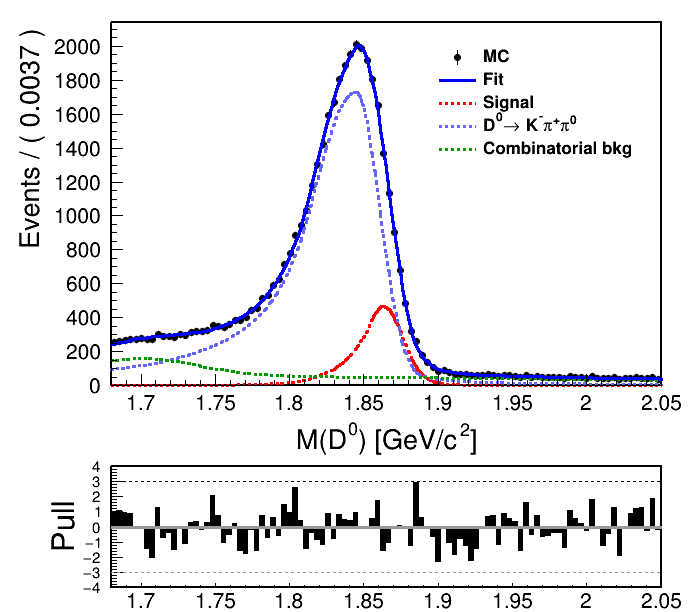

In [122]:
from IPython.display import Image
# Image("test2_x_D0.png")
Image(file1_name)

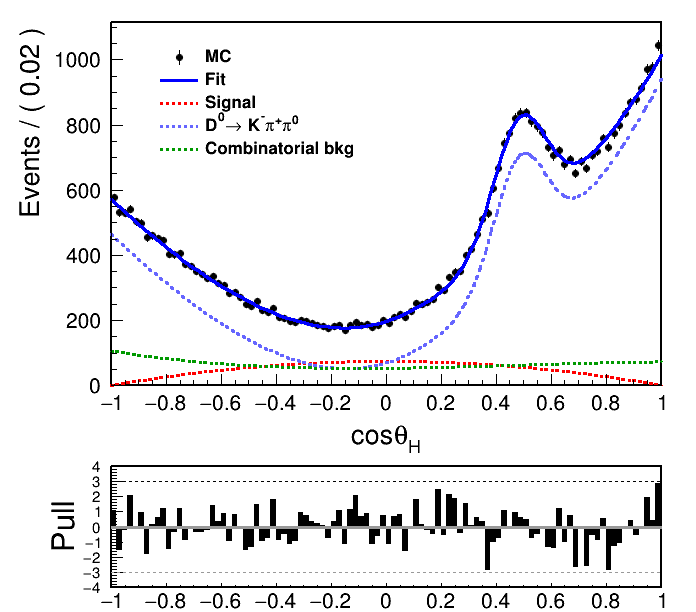

In [123]:
from IPython.display import Image
# Image("test2_x_D0.png")
Image(file2_name)

# Fit results 

In [90]:
extended_model.Print("t")


0x55a93c050f60 RooAddPdf::extended_model = 0.200358 [Auto,Dirty] 
  0x55a93b5f7240/V- RooProdPdf::sig_model = 0.991535 [Auto,Dirty] 
  RooProdPdf begin partial integral cache
  [0]0x55a93c084c00 RooAddPdf::x_sig_model = 0.991535 [Auto,Dirty] 
  [0]  0x55a93eff81f0/V- RooGaussian::x_sig_sig1 = 0.9972 [Auto,Dirty] 
  [0]    0x55a9270d33a0/V- RooRealVar::D0_M = 1.865
  [0]    0x55a927b82e40/V- RooRealVar::x_sig_mean = 1.86334
  [0]    0x55a93b9f8ce0/V- RooRealVar::x_sig_sigma1 = 0.0222003
  [0]  0x55a93bbc62d0/V- RooRealVar::x_sig_sig1frac = 0.134174
  [0]  0x55a93f0744d0/V- RooCBShape::x_sig_sig2 = 0.990658 [Auto,Dirty] 
  [0]    0x55a9270d33a0/V- RooRealVar::D0_M = 1.865
  [0]    0x55a927b82e40/V- RooRealVar::x_sig_mean = 1.86334
  [0]    0x55a92740d440/V- RooRealVar::x_sig_sigma2 = 0.0121331
  [0]    0x55a93d4878e0/V- RooRealVar::x_sig_alpha = 0.693892
  [0]    0x55a93bc55840/V- RooRealVar::x_sig_n_CB = 19.9976
  [0]0x55a93b669cf0 MyPdf_one_minus_squared::y_sig_model = 1 [Auto,Dirty] 


In [109]:
# extended_model.Print("t")
print(nsig)
print(nbkg1)
print(nbkg2)
# print(nbkg3)

RooRealVar::nsig = 4932.27 +/- 57.6008  L(0 - 22580.8) 

RooRealVar::nbkg1 = 33726.5 +/- 112.057  L(0 - 45161.5) 

RooRealVar::nbkg2 = 6502.97 +/- 62.3984  L(0 - 45161.5) 



In [112]:
# base_file_loc =  '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_preext_maxFBDT_2ndFBDT/'
base_file_loc =  '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_sigext_maxFBDT_2ndFBDT/'

topo_file_D0 = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_sigext_maxFBDT_2ndFBDT/' + 'topo/resultfile/result_antiKstar/standard.root'
topo_file_D0bar = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_sigext_maxFBDT_2ndFBDT/' + 'topo/resultfile/result_antiKstar_cc/standard.root'

# Cut="D0_M>1.68 & D0_M<2.05 & abs(Phi_M - 1.0195) < 0.011 &  Dstarp_CMS_p>2.5  "
# Cut+="& gamma_E>0.47 & Pi0_Prob2>0.5 & abs(Dstarp_delM-0.1455)<0.00078"

base_cut="D0_M>1.68 && D0_M<2.05 && abs(antiKstar_M - 0.89555) < 0.06 &&  Dstarp_CMS_p>2.5 "
base_cut+="&& gamma_E>0.45 && Pi0_Prob2>0.58 && abs(Dstarp_delM-0.1455)<0.00077 "
D0_cut = base_cut + ' && nSigCascDcyBr_1==1'
D0bar_cut = base_cut + ' && nSigCascDcyBr_5==1'
D0_tree = 'antiKstar'
D0bar_tree = 'antiKstar_cc'
# def get_Nevents(file, tree=str, base_filter=str, variables=list):
variables = ['D0_M']
Nsig = get_Nevents(topo_file_D0, D0_tree, D0_cut, variables )
Nsig_cc = get_Nevents(topo_file_D0bar, D0bar_tree, D0bar_cut, variables )


In [113]:

D0_bkg1cut = base_cut + '  && (iCascDcyBrP_Dst_0==1 || iCascDcyBrP_Dst_0==2) '
D0bar_bkg1cut = base_cut + ' && (iCascDcyBrP_Dstm_0==0 || iCascDcyBrP_Dstm_0==3)'
Nbkg1 = get_Nevents(topo_file_D0, D0_tree, D0_bkg1cut, variables )
Nbkg1_cc = get_Nevents(topo_file_D0bar, D0bar_tree, D0bar_bkg1cut, variables )


In [114]:

D0_bkg2cut = base_cut + ' && nSigCascDcyBr_1!=1  && iCascDcyBrP_Dst_0!=1 && iCascDcyBrP_Dst_0!=2'
D0bar_bkg2cut = base_cut + '&& nSigCascDcyBr_5!=1 && iCascDcyBrP_Dstm_0!=0 && iCascDcyBrP_Dstm_0!=3'
Nbkg2 = get_Nevents(topo_file_D0, D0_tree, D0_bkg2cut, variables )
Nbkg2_cc = get_Nevents(topo_file_D0bar, D0bar_tree, D0bar_bkg2cut, variables )


In [115]:


charged_file_D0 = base_file_loc + 'charged/*.root'
mixed_file_D0 = base_file_loc + 'mixed/*.root'
uubar_file_D0 = base_file_loc + 'uubar/*.root'
ddbar_file_D0 = base_file_loc + 'ddbar/*.root'
ssbar_file_D0 = base_file_loc + 'ssbar/*.root'
taupair_file_D0 = base_file_loc + 'taupair/*.root'


Nbkg2 += get_Nevents(charged_file_D0, D0_tree, base_cut, variables )
Nbkg2 += get_Nevents(mixed_file_D0, D0_tree, base_cut, variables )
Nbkg2 += get_Nevents(uubar_file_D0, D0_tree, base_cut, variables )
Nbkg2 += get_Nevents(ddbar_file_D0, D0_tree, base_cut, variables )
Nbkg2 += get_Nevents(ssbar_file_D0, D0_tree, base_cut, variables )
Nbkg2 += get_Nevents(taupair_file_D0, D0_tree, base_cut, variables )

Nbkg2_cc += get_Nevents(mixed_file_D0, D0bar_tree, base_cut, variables )
Nbkg2_cc += get_Nevents(uubar_file_D0, D0bar_tree, base_cut, variables )
Nbkg2_cc += get_Nevents(ddbar_file_D0, D0bar_tree, base_cut, variables )
Nbkg2_cc += get_Nevents(ssbar_file_D0, D0bar_tree, base_cut, variables )
Nbkg2_cc += get_Nevents(taupair_file_D0, D0bar_tree, base_cut, variables )

In [116]:
scale_factor=1/4
Nsig=Nsig*scale_factor
Nsig_cc=Nsig_cc*scale_factor
Nbkg1=Nbkg1*scale_factor
Nbkg1_cc=Nbkg1_cc*scale_factor
Nbkg2=Nbkg2*scale_factor
Nbkg2_cc=Nbkg2_cc*scale_factor


In [117]:

Fit_Nsig = nsig.getValV()
Fit_Nsig_error = nsig.getError()

Fit_Nbkg1 = nbkg1.getValV()
Fit_Nbkg1_error = nbkg1.getError()
Fit_Nbkg2 = nbkg2.getValV()
Fit_Nbkg2_error = nbkg2.getError()


print(f'Nsig(D0)_topo={ Nsig }')
print(f'Nsig(D0bar)_topo={ Nsig_cc }')
print(f'Total: { Nsig + Nsig_cc }')
print(f'Fit: {Fit_Nsig}')
print(f'Fit Error: {Fit_Nsig_error}')

print(f'Pull = {(Fit_Nsig-Nsig-Nsig_cc)/Fit_Nsig_error}')
print('\n')
print(f'Nbkg1(D0)_topo={ Nbkg1 }')
print(f'Nbkg1(D0bar)_topo={ Nbkg1_cc }')
print(f'Total: { Nbkg1 + Nbkg1_cc }')
print(f'Fit: {Fit_Nbkg1}')
print(f'Fit Error: {Fit_Nbkg1_error}')

print(f'Pull = {(Fit_Nbkg1-Nbkg1-Nbkg1_cc)/Fit_Nbkg1_error}')

print('\n')
print(f'Nothers(D0)_topo={ Nbkg2 }')
print(f'Nothers(D0bar)_topo={ Nbkg2_cc }')
print(f'Total: { Nbkg2 + Nbkg2_cc }')
print(f'Fit: {Fit_Nbkg2}')
print(f'Fit Error: {Fit_Nbkg2_error}')

print(f'Pull = {(Fit_Nbkg2-Nbkg2-Nbkg2_cc)/Fit_Nbkg2_error}')

Nsig(D0)_topo=2539.0
Nsig(D0bar)_topo=2496.25
Total: 5035.25
Fit: 4932.272990258823
Fit Error: 57.600792894952804
Pull = -1.787770698382186


Nbkg1(D0)_topo=17104.5
Nbkg1(D0bar)_topo=16571.75
Total: 33676.25
Fit: 33726.469707896606
Fit Error: 112.05743532301422
Pull = 0.4481604255161057


Nothers(D0)_topo=3036.0
Nothers(D0bar)_topo=2831.75
Total: 5867.75
Fit: 6502.972183131219
Fit Error: 62.39839791567724
Pull = 10.180104046735838


In [118]:
# data_dict = { 'Type' : ['signal', r'$D^0 \to \phi \pi^0$', r'$D^0 \to \phi X$', 'Others'],
data_dict = { r'$N_{topo}$': [Nsig + Nsig_cc , Nbkg1 + Nbkg1_cc,  Nbkg2 + Nbkg2_cc],
             'Fit': [Fit_Nsig, Fit_Nbkg1, Fit_Nbkg2],
             'Fit Error' : [Fit_Nsig_error, Fit_Nbkg1_error, Fit_Nbkg2_error],
             'Pull': [(Fit_Nsig-Nsig-Nsig_cc)/Fit_Nsig_error, (Fit_Nbkg1-Nbkg1-Nbkg1_cc)/Fit_Nbkg1_error, (Fit_Nbkg2-Nbkg2-Nbkg2_cc)/Fit_Nbkg2_error ] 
            }

In [119]:
df = pd.DataFrame(data_dict)
df.index = ['Signal', r'$D^0 \to K^- \pi^+ \pi^0$','Others']
df

,$N_{topo}$,Fit,Fit Error,Pull
Signal,5035.25,4932.272990,57.600793,-1.787771
$D^0 \to K^- \pi^+ \pi^0$,33676.25,33726.469708,112.057435,0.448160
Others,5867.75,6502.972183,62.398398,10.180104


In [50]:
print(df.to_latex())


\begin{tabular}{lrrrr}
\toprule
{} &  \$N\_\{topo\}\$ &          Fit &   Fit Error &      Pull \\
\midrule
Signal               &      278.75 &   286.779503 &   24.645926 &  0.325794 \\
\$D\textasciicircum 0 \textbackslash to \textbackslash phi \textbackslash pi\textasciicircum 0\$ &     1174.00 &  1184.106165 &   52.056228 &  0.194139 \\
\$D\textasciicircum 0 \textbackslash to \textbackslash phi X\$     &      111.75 &    76.788718 &  114.419866 & -0.305553 \\
Others               &      505.75 &   575.082853 &   99.818114 &  0.694592 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_94259/2621526293.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


In [51]:
import csv

# CSV file name
csv_file = '/media/jykim/T7/saved_plots/Measurement/phi/mc15rd_fit_results.csv'

# Write the dictionary to a CSV file
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    
    # Write the header row
    header = list(data_dict.keys())
    writer.writerow(header)
    
    # Write the data rows
    for row in zip(*data_dict.values()):
        writer.writerow(row)

print(f'Data saved to {csv_file}')

Data saved to /media/jykim/T7/saved_plots/Measurement/phi/mc15rd_fit_results.csv
